In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [15]:
months = pd.date_range(start='2021-01-01', end='2022-12-31', freq='MS')
volumes = list(range(98, 105))  # Example volumes released during 2021-2022

# Generate structured sales data
structured_data = []

for i, month in enumerate(months):
    year = month.year
    # Simulate "release bump": higher sales for first 2 months of a volume
    volume_idx = (i // 4) % len(volumes)  # new volume every 4 months
    volume = volumes[volume_idx]
    
    if i % 4 == 0:  # new volume release month
        units_sold = 500_000
    elif i % 4 == 1:  # post-release bump
        units_sold = 300_000
    else:  # normal months
        units_sold = 150_000
    
    price = 5  # fixed price per volume in USD
    revenue = units_sold * price
    structured_data.append([month, year, volume, units_sold, price, revenue])

df = pd.DataFrame(structured_data, columns=['Month', 'Year', 'Volume', 'Units_Sold', 'Price', 'Revenue'])

In [16]:
df.dropna(inplace=True)
print("Data points after cleaning:", df.shape[0])

Data points after cleaning: 24


In [17]:
print("No outlier removal needed.")


No outlier removal needed.


In [18]:
mean_revenue = np.mean(df['Revenue'])
median_units = np.median(df['Units_Sold'])
std_price = np.std(df['Price'])
max_units = np.max(df['Units_Sold'])
min_units = np.min(df['Units_Sold'])

print("\nNumPy Operations:")
print("Mean Revenue:", mean_revenue)
print("Median Units Sold:", median_units)
print("Std Dev of Price:", std_price)
print("Max Units Sold:", max_units)
print("Min Units Sold:", min_units)


NumPy Operations:
Mean Revenue: 1375000.0
Median Units Sold: 225000.0
Std Dev of Price: 0.0
Max Units Sold: 500000
Min Units Sold: 150000


In [19]:
pearson_corr, _ = stats.pearsonr(df['Units_Sold'], df['Revenue'])
print("\nSciPy Pearson correlation (Units Sold vs Revenue):", pearson_corr)



SciPy Pearson correlation (Units Sold vs Revenue): 1.0


In [20]:
X = sm.add_constant(df['Units_Sold'])
model = sm.OLS(df['Revenue'], X).fit()
print("\nStatsmodels Regression Summary:\n", model.summary())


Statsmodels Regression Summary:
                             OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.298e+31
Date:                Thu, 29 May 2025   Prob (F-statistic):               0.00
Time:                        23:47:59   Log-Likelihood:                 464.92
No. Observations:                  24   AIC:                            -925.8
Df Residuals:                      22   BIC:                            -923.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.492e

C:\Users\Shan Christian\AppData\Local\Temp\ipykernel_1728\3529605321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Volume', y='Revenue', data=df, palette='Set3')


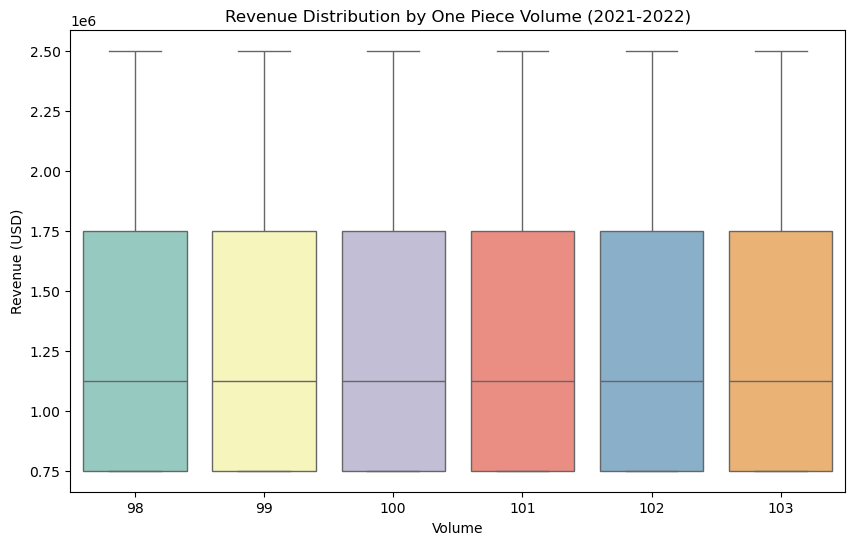

C:\Users\Shan Christian\AppData\Local\Temp\ipykernel_1728\3529605321.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Volume', y='Units_Sold', data=df, ci=None, palette='Set2')
C:\Users\Shan Christian\AppData\Local\Temp\ipykernel_1728\3529605321.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Volume', y='Units_Sold', data=df, ci=None, palette='Set2')


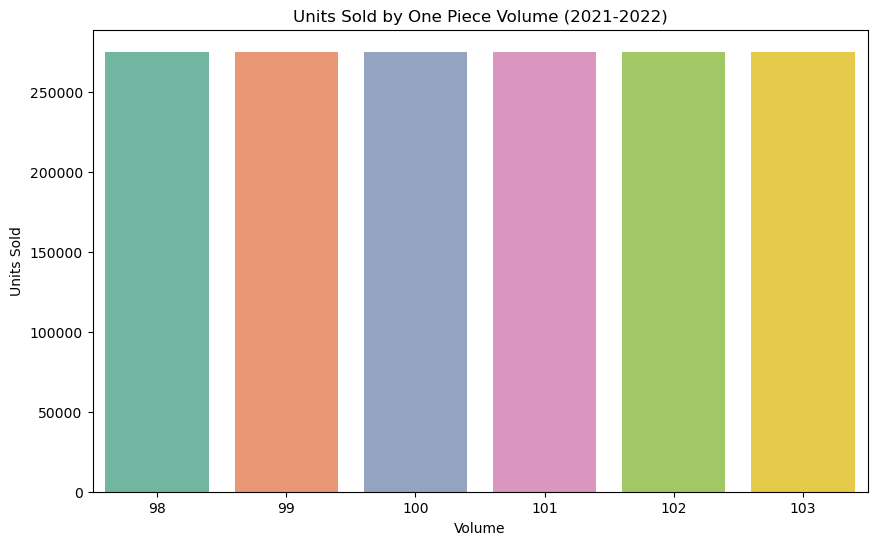

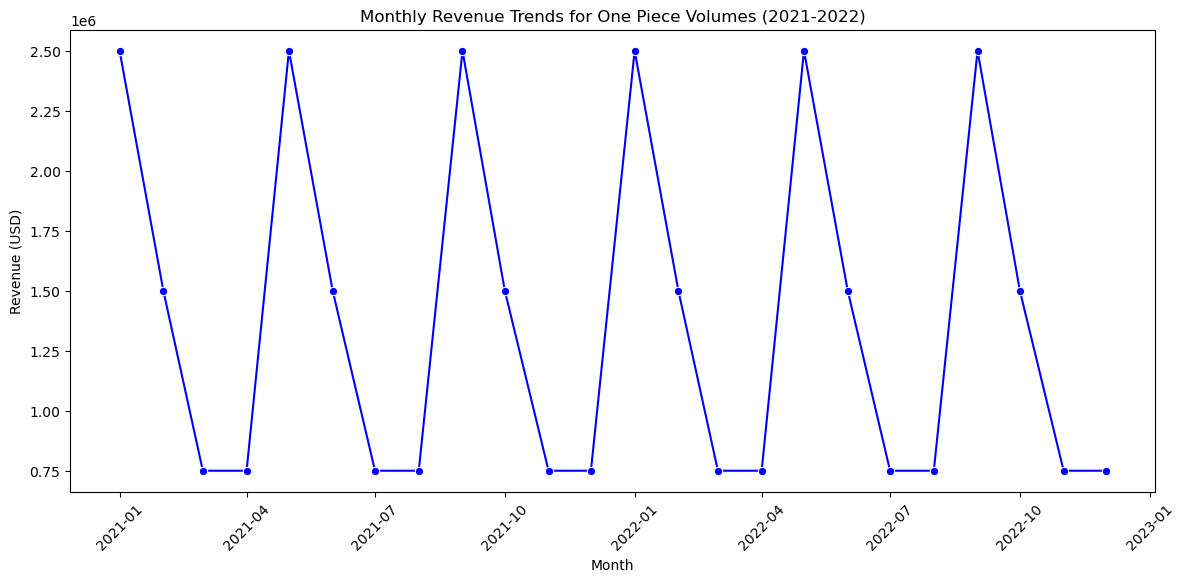

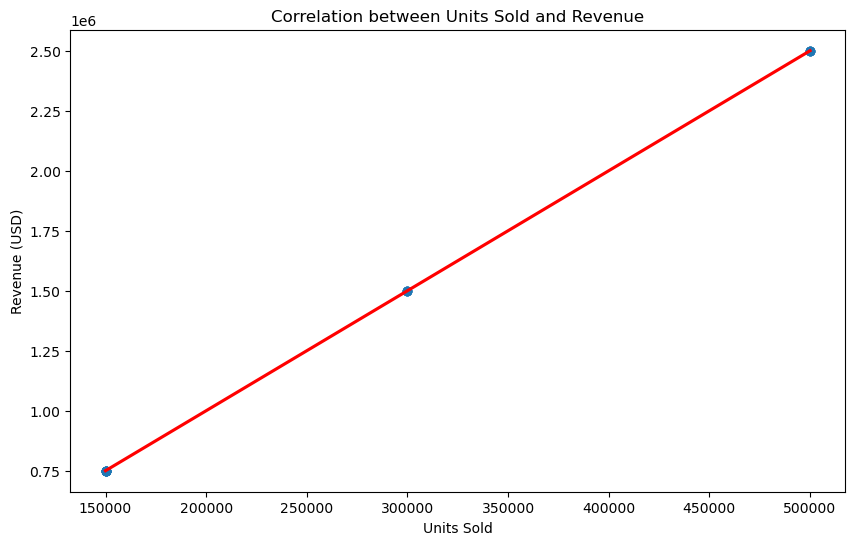


Correlation Matrix:
             Units_Sold  Revenue
Units_Sold         1.0      1.0
Revenue            1.0      1.0

Cleaned dataset saved to one_piece_sales_2021_2022.csv


In [22]:
# Revenue by Volume
plt.figure(figsize=(10, 6))
sns.boxplot(x='Volume', y='Revenue', data=df, palette='Set3')
plt.title('Revenue Distribution by One Piece Volume (2021-2022)')
plt.xlabel('Volume')
plt.ylabel('Revenue (USD)')
plt.show()

# Units Sold by Volume
plt.figure(figsize=(10, 6))
sns.barplot(x='Volume', y='Units_Sold', data=df, ci=None, palette='Set2')
plt.title('Units Sold by One Piece Volume (2021-2022)')
plt.xlabel('Volume')
plt.ylabel('Units Sold')
plt.show()

# Monthly Revenue Trends
plt.figure(figsize=(14, 6))
sns.lineplot(x='Month', y='Revenue', data=df, marker='o', color='blue')
plt.title('Monthly Revenue Trends for One Piece Volumes (2021-2022)')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

# Correlation plot: Units Sold vs Revenue
plt.figure(figsize=(10, 6))
sns.regplot(x='Units_Sold', y='Revenue', data=df, line_kws={"color": "red"})
plt.title('Correlation between Units Sold and Revenue')
plt.xlabel('Units Sold')
plt.ylabel('Revenue (USD)')
plt.show()

# Correlation matrix
corr_matrix = df[['Units_Sold', 'Revenue']].corr()
print("\nCorrelation Matrix:\n", corr_matrix)

# Save final cleaned dataset
df.to_csv('one_piece_sales_2021_2022.csv', index=False)
print("\nCleaned dataset saved to one_piece_sales_2021_2022.csv")